In [2]:
import sys
import os
os.environ['TRANSFORMERS_CACHE'] = '/mnt/swordfish-pool2/milad/hf-cache'
os.environ['HF_DATASETS_CACHE'] = '/mnt/swordfish-pool2/milad/hf-cache'
os.environ['OPENAI_API_KEY'] = 'zTbZNk16Ik1pZnqLn38ZT3BlbkFJImq3pd7widkr7RzsC771'
os.environ['CUDA_VISIBLE_DEVICES'] = '6'

sys.path.append('/local/nlp/milad/code/explainability-of-art-images/')

In [3]:
import torch
from PIL import Image
from IPython.display import Image
import pandas as pd
import json
import glob
import re

In [9]:
sample_images_paths = list(glob.glob('/mnt/swordfish-pool2/milad/explainability-for-art-images/art_images_data/sample_images/*'))

image_descriptions  = json.load(open('./data/Painting-Form/share4v_painting_form_image_description.json'))
image_descriptions  = {x[0].replace('/images/', '/sample_images/'): x[1] for x in image_descriptions.items()}
image_descriptions = {x[0]: x[1] for x in image_descriptions.items() if x[0] in sample_images_paths}

In [10]:
json.dump(image_descriptions, open('./data/Painting-Form/share4v_painting_form_sample_image_description.json', 'w'))

In [11]:
len(image_descriptions)

1000

In [35]:
def display_image(image_name, image_descriptions):
    display(Image(filename=image_name))
    print(image_descriptions[image_name])

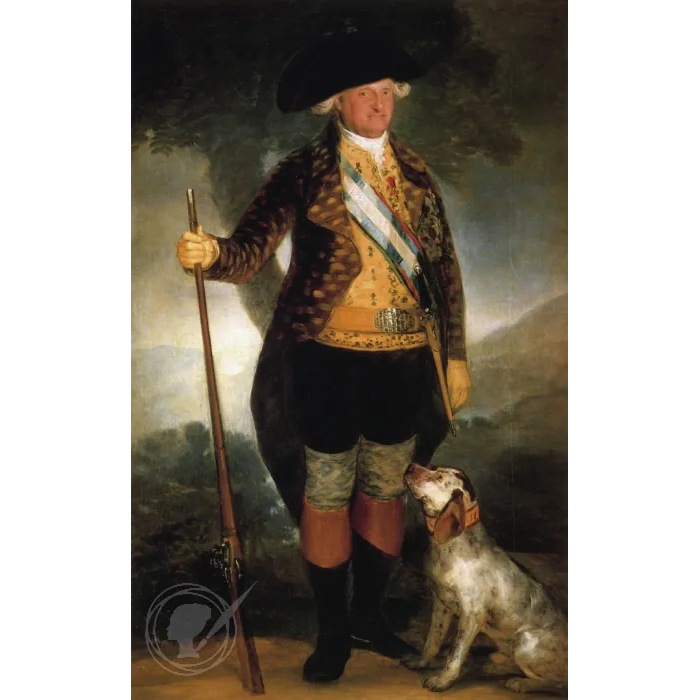

["The image portrays a man in a historical military uniform, standing next to a dog. The man is holding a sword in his right hand and a cane in his left, suggesting a sense of authority and power. He is wearing a hat adorned with a feather, further emphasizing his status. The background features a landscape with trees and mountains, providing a sense of depth and context to the scene. The painting is executed in a realistic style, with a focus on the man's attire and the dog's features, indicating a high level of detail and skill in the artist's craft. The genre of the artwork is likely historical or portraiture, given the subject matter and the artist's attention to detail."]


In [37]:
display_image(sample_images_paths[2], image_descriptions)

In [38]:
desc_list = [x[0] for x in image_descriptions.values()]

In [44]:
desc_list = [re.findall(r"([^.]*?style[^.]*\.)", txt) for txt in desc_list]

In [45]:
desc_list

[[' The painting is executed in an impressionist style, characterized by loose brushstrokes that emphasize the interplay of light and shadow.'],
 ['The image is a captivating oil painting that captures the essence of the Impressionist style.',
  ' The artist has skillfully used color and light to create a sense of depth and realism, while also adhering to the loose brushwork and emphasis on color that are hallmarks of the Impressionist style.'],
 [" The painting is executed in a realistic style, with a focus on the man's facial expression and the intricate details of his attire."],
 [" The painting is executed in the Baroque style, characterized by its dramatic use of light and shadow, and the artist's skillful use of color and detail."],
 [' The artist has used a loose, sketchy style, which is characteristic of the impressionist genre.'],
 [' The painting is executed in an impressionist style, characterized by loose brushstrokes and a focus on the interplay of light and color.'],
 [" 